This script reads in the multiple linear regression model results between Active GCA and Healthy controls. It gathers the proteins from Active GCA and Healthy control and makes a heatmap after doing a z-score transformation on the data. Age, sex, smoking status, and BMI are denoted at the top of each heatmap for each study participant.

In [ ]:
library("dplyr")
library("ggpubr")
library("lme4")
library("lmerTest")
library("ggplot2")
library("pheatmap")

vasculitis_demographics_df <- read.csv("../../data/vasculitis_patient_info.csv")

#read in all quantile data
all_quantile_df = read.csv("../../data/all_quantile_data.csv")
#head(all_quantile_df)
#get the number of columns and rows 
num_columns <- ncol(all_quantile_df)
num_proteins <- ncol(all_quantile_df) - 3
num_samples <- nrow(all_quantile_df)


#filter only active gca patients
active_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Active")
active_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Active")
active_proteins_only <- active_df[,4:num_columns]

#filter inactive gca patients
inactive_df = filter(all_quantile_df,all_quantile_df$Study_group == "Inactive")
inactive_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Inactive")
inactive_proteins_only <- inactive_df[,4:num_columns]

#read in controls data
controls_demographics_df <- read.csv("../../data/controls_demographics.csv")
controls_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Healthy_Control")
controls_proteins_only <- controls_df[,4:num_columns]

proteins_only <- data.frame(active_df[ ,4:num_columns])
#seperate the protein names for the linear model
protein_names <- data.frame(matrix(data=0,nrow=num_proteins,ncol=1))
colnames(protein_names) <- "Protein"
protein_names[ , 1] <- data.frame(colnames(proteins_only))
#protein_names

In [2]:
#read in linear modeling results between Active GCA and controls
active_GCA_vs_controls_results = read.csv("../../analysis/linear_modeling_active_and_controls/adjusted_linear_modeling_results.csv")
positive_active_GCA_vs_controls_results = filter(active_GCA_vs_controls_results,active_GCA_vs_controls_results$linear_modeling_pvalue < 0.01 & active_GCA_vs_controls_results$fold_change > 0)
dim(positive_active_GCA_vs_controls_results)
num_higher_in_active = nrow(positive_active_GCA_vs_controls_results)
negative_active_GCA_vs_controls_results = filter(active_GCA_vs_controls_results,active_GCA_vs_controls_results$linear_modeling_pvalue < 0.01 & active_GCA_vs_controls_results$fold_change < 0)
dim(negative_active_GCA_vs_controls_results)
num_lower_in_active = nrow(negative_active_GCA_vs_controls_results)
num_significant_active = num_higher_in_active+num_lower_in_active

[1] 202   9

[1] 335   9

In [3]:
get_sigfeatures = function(num_sigfigs, sigfeature_list, data_df, results_df){
  #Gather the significant features into a new dataframe
  for (i in 1:num_sigfigs) {
    feature1 <- sigfeature_list[i,1]
    feature_to_add <- data_df[feature1]
    results_df[,i] <- feature_to_add
  }
  return(results_df)
}

In [4]:
active_df = active_df[order(active_df$maskID),]
active_demographics_df = active_demographics_df[order(active_demographics_df$maskid),]
active_df$maskID == active_demographics_df$maskid

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [5]:
active_df$maskID

[1] "GCA-1"  "GCA-10" "GCA-11" "GCA-12" "GCA-13" "GCA-14" "GCA-15" "GCA-16"
 [9] "GCA-17" "GCA-18" "GCA-19" "GCA-2"  "GCA-20" "GCA-21" "GCA-22" "GCA-23"
[17] "GCA-24" "GCA-25" "GCA-26" "GCA-27" "GCA-28" "GCA-29" "GCA-3"  "GCA-30"
[25] "GCA-4"  "GCA-5"  "GCA-6"  "GCA-7"  "GCA-8"  "GCA-9"

In [6]:
controls_df = controls_df[order(controls_df$maskID),]
controls_demographics_df = controls_demographics_df[order(controls_demographics_df$case_id),]
controls_df$maskID == controls_demographics_df$case_id

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [7]:
controls_demographics_df$BMI_Kg_M2

[1] 13.94703 28.34196       NA 26.62512 19.89081 28.66156 25.82441 24.40730
 [9] 19.02165 23.82625 10.31723 27.86087 19.57036 29.95326 23.95997 25.67822
[17] 19.73950 30.95170 32.92209 23.67479 21.96539 22.35104 20.65953 33.65664
[25] 24.69157 23.02823 20.67391 27.46366 27.43508 25.86247

In [8]:
#collect the proteins that are differentially abundant only
#start with the 202 that are differentailly abundant and higher in Active GCA compared
#to controls
active_proteins_higher_in_GCA = data.frame(matrix(data=0,nrow=30,ncol=num_higher_in_active))
colnames(active_proteins_higher_in_GCA) = positive_active_GCA_vs_controls_results$Protein
active_proteins_higher_in_GCA_names = data.frame(positive_active_GCA_vs_controls_results$Protein)
active_proteins_higher_in_GCA = get_sigfeatures(num_higher_in_active,active_proteins_higher_in_GCA_names, active_df, active_proteins_higher_in_GCA)
dim(active_proteins_higher_in_GCA)

[1]  30 202

In [9]:
head(active_proteins_higher_in_GCA)

,CRBB2_10000.28,DUS4_10035.6,ZHX3_10036.201,Alpha.amylase.2B_10439.57,IL.31_10455.196,PUF60_10575.31,NDUB4_10677.9,fibulin.5_10738.11,SLIK1_10743.13,KERA_10758.2,⋯,Galectin.7_9196.8,Fas..soluble_9218.7,SIRPG_9241.40,IL.17C_9255.5,CBPA2_9276.7,WFDC1_9316.67,Apo.L1_9506.10,SCAR3.region.1_9569.14,Laminin.gamma.2_9580.5,MUCDL_9962.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,736.6811,529.4944,3461.126,14761.190,415.8700,5148.057,4695.104,39605.07,5222.057,2458.498,⋯,4774.578,374.8756,592.3250,2310.569,1151.0389,10027.636,4303.878,379.3633,3606.211,1469.251
2,604.3556,716.9878,3130.078,14587.246,840.1144,9988.183,3593.174,37856.47,7984.596,2503.682,⋯,2520.456,422.6900,465.7378,1662.462,860.1556,9115.484,3242.153,455.6822,4726.852,1405.666
3,1347.5344,500.0217,2464.006,4990.573,686.4600,40544.120,3461.126,34506.05,3676.508,2273.000,⋯,4608.950,422.1533,680.6244,1156.824,800.3183,11817.427,1697.960,465.9144,3680.326,1368.229
4,549.8122,589.5667,2503.682,10318.707,350.1967,6331.273,3901.868,35595.28,7802.196,1580.453,⋯,2655.734,396.6944,553.0572,1372.633,812.1533,9601.716,2438.378,448.8756,3620.776,1564.616
5,506.3311,520.2533,2330.042,4879.604,548.1989,4282.870,3020.082,28471.01,4730.813,1983.512,⋯,1876.650,383.6900,455.1333,1249.787,754.9711,7909.668,1912.566,365.4544,3200.256,1317.200
6,691.6233,454.3444,2625.886,6103.280,531.6561,6472.714,2102.507,24523.33,6293.910,1485.514,⋯,2553.939,361.3478,487.5300,1173.930,685.2467,7590.902,2065.932,437.9733,2179.508,1179.318


In [10]:
#now do the same for controls and combine to plot
control_proteins_higher_in_GCA = data.frame(matrix(data=0,nrow=30,ncol=num_higher_in_active))
colnames(control_proteins_higher_in_GCA) = positive_active_GCA_vs_controls_results$Protein
control_proteins_higher_in_GCA = get_sigfeatures(num_higher_in_active,active_proteins_higher_in_GCA_names,controls_df,control_proteins_higher_in_GCA)
head(control_proteins_higher_in_GCA)
dim(control_proteins_higher_in_GCA)

,CRBB2_10000.28,DUS4_10035.6,ZHX3_10036.201,Alpha.amylase.2B_10439.57,IL.31_10455.196,PUF60_10575.31,NDUB4_10677.9,fibulin.5_10738.11,SLIK1_10743.13,KERA_10758.2,⋯,Galectin.7_9196.8,Fas..soluble_9218.7,SIRPG_9241.40,IL.17C_9255.5,CBPA2_9276.7,WFDC1_9316.67,Apo.L1_9506.10,SCAR3.region.1_9569.14,Laminin.gamma.2_9580.5,MUCDL_9962.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,439.8122,410.9078,1724.384,2625.886,376.7122,2718.098,1727.2778,15723.346,1076.353,1722.029,⋯,2111.261,307.2589,425.7433,924.9011,632.6617,4960.710,1699.010,348.5156,1717.8933,982.9078
2,446.7506,393.1200,1699.010,3897.811,501.5367,2322.331,1599.8044,8952.921,2405.658,1345.728,⋯,2137.667,279.2133,419.4067,891.6178,666.9089,4449.519,1558.841,396.3289,1392.9389,880.5344
3,470.5311,438.5811,2205.246,3234.187,441.9111,2829.484,2312.0911,14761.190,2024.938,1437.099,⋯,1983.512,314.9183,447.5689,970.8778,722.7044,4960.710,1748.640,352.3833,1557.2067,1050.5689
4,476.0956,471.9178,1689.977,2987.576,381.6467,2224.780,2113.1411,7202.520,2517.134,1031.513,⋯,2267.190,272.8089,425.1967,914.4189,827.1911,5139.528,1684.384,345.1289,960.9011,1060.7683
5,459.7622,428.8100,2057.002,3580.768,349.5411,3813.698,967.1767,20072.934,1203.723,1489.620,⋯,2964.894,308.9178,376.1756,1097.5578,610.4939,7885.653,1866.017,413.0011,2077.0889,901.2622
6,785.7911,498.2100,1946.976,3680.326,351.9600,3677.801,1622.0678,17196.722,2518.817,1744.879,⋯,3009.681,305.3233,426.4756,1020.2311,614.7867,6668.847,2024.938,345.6644,1595.8900,969.0011


[1]  30 202

In [11]:
#combine
proteins_higher_in_active_GCA = rbind(active_proteins_higher_in_GCA,control_proteins_higher_in_GCA)
dim(proteins_higher_in_active_GCA)


[1]  60 202

In [12]:
#gather the 335 proteins that are lower in active GCA compared to controls
lower_proteins_active = data.frame(matrix(data=0,nrow=30,ncol=num_lower_in_active))
colnames(lower_proteins_active) = negative_active_GCA_vs_controls_results$Protein
lower_proteins_names = data.frame(negative_active_GCA_vs_controls_results$Protein)
lower_proteins_active = get_sigfeatures(num_lower_in_active,lower_proteins_names,active_df,lower_proteins_active)
lower_proteins_active$Study_group = active_df$Study_group
lower_proteins_active$sample_ID = active_df$sample_ID
lower_proteins_active$smoking = active_demographics_df$Smoking
lower_proteins_active$sex = active_demographics_df$Sex
lower_proteins_active$age = active_demographics_df$Age
lower_proteins_active$bmi = active_demographics_df$BMI_Kg_M2

dim(lower_proteins_active)
head(lower_proteins_active)

[1]  30 341

,c.Raf_10001.7,PNP_10039.32,AP4M1_10076.1,CHIP_10336.3,STAT3_10346.5,STAT3_10354.57,SMAD2_10364.6,STAT6_10372.18,TOIP1.Perinuclear_10606.34,SPG21_11122.97,⋯,JNK2_9760.13,HNRPF_9764.79,PPIL1_9884.8,DUS28_9940.35,Study_group,sample_ID,smoking,sex,age,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,263.2578,2557.2789,1005.184,491.8500,9648.372,4307.828,1772.148,3558.878,4009.732,832.6033,⋯,1550.937,15688.08,105.26333,577.2289,Active,KP9U,No,Male,69.0,NA
2,406.9444,764.1722,1194.351,308.2200,11141.669,2265.757,1025.493,5022.624,3348.914,695.3467,⋯,1950.906,10565.51,70.46000,261.9622,Active,KP65,No,Female,71.7,27.10246
3,294.2639,1989.4622,1036.853,1054.3589,17685.076,3942.456,3115.541,5102.097,4237.524,961.2589,⋯,1796.766,15496.63,98.59000,1454.0489,Active,KP6H,No,Male,79.6,26.18892
4,254.1578,2018.2022,1762.241,447.1617,5786.329,3003.198,1240.193,4695.104,3530.391,623.5244,⋯,1491.161,13857.42,96.24111,364.5522,Active,KP68,Yes,Female,63.1,28.44349
5,242.9217,3476.9056,1040.701,1235.3483,15192.339,3120.728,3271.910,3984.198,3378.125,976.5900,⋯,2239.026,17556.17,82.01111,1213.6989,Active,KNYU,Yes,Female,65.3,23.56477
6,281.0356,4560.0644,1207.074,439.6278,12079.622,2354.303,1439.619,3564.731,6231.301,773.1917,⋯,1697.037,32904.98,119.20444,312.2956,Active,KP9R,No,Female,72.4,29.70839


In [13]:
#do the same for controls
lower_proteins_control = data.frame(matrix(data=0,nrow=30,ncol=num_lower_in_active))
colnames(lower_proteins_control) = negative_active_GCA_vs_controls_results$Protein
lower_proteins_control = get_sigfeatures(num_lower_in_active,lower_proteins_names,controls_df,lower_proteins_control)
lower_proteins_control$Study_group = controls_df$Study_group
lower_proteins_control$sample_ID = controls_df$sample_ID
lower_proteins_control$smoking = controls_demographics_df$Smoking
lower_proteins_control$sex = controls_demographics_df$control_gender
lower_proteins_control$age = controls_demographics_df$Age
lower_proteins_control$bmi = controls_demographics_df$BMI_Kg_M2


dim(lower_proteins_control)
head(lower_proteins_control)

[1]  30 341

,c.Raf_10001.7,PNP_10039.32,AP4M1_10076.1,CHIP_10336.3,STAT3_10346.5,STAT3_10354.57,SMAD2_10364.6,STAT6_10372.18,TOIP1.Perinuclear_10606.34,SPG21_11122.97,⋯,JNK2_9760.13,HNRPF_9764.79,PPIL1_9884.8,DUS28_9940.35,Study_group,sample_ID,smoking,sex,age,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,712.5500,6867.486,1902.852,3072.911,44995.91,9826.001,10646.373,9710.861,7069.563,2520.456,⋯,4278.676,29498.94,233.83889,3564.731,Healthy_Control,22103005529,Yes,Male,71,13.94703
2,1028.2911,7304.909,2949.580,3285.238,42636.64,10373.630,12018.820,10845.076,6936.004,3393.936,⋯,5322.406,31327.95,392.76222,5780.831,Healthy_Control,22103004925,Yes,Female,72,28.34196
3,764.6367,6072.292,2456.851,2417.522,36490.44,9339.211,9663.853,10174.983,6819.681,2419.532,⋯,3742.996,29707.01,225.15444,2773.471,Healthy_Control,22103004932,Yes,Male,78,NA
4,1163.6611,10442.700,3350.176,3810.770,50673.13,10517.229,11853.703,12332.859,8674.196,3923.699,⋯,5228.029,32782.35,385.83556,4274.401,Healthy_Control,22103004914,No,Female,64,26.62512
5,313.0933,6464.126,1084.618,2624.202,26705.90,6613.471,5992.352,6197.260,5407.906,2037.228,⋯,3154.207,22583.70,186.92611,3749.327,Healthy_Control,22103005528,No,Female,67,19.89081
6,482.3789,4936.073,1598.349,1525.716,31019.51,6155.934,7731.137,7623.699,3762.667,1352.204,⋯,3504.233,31542.23,96.24111,3533.322,Healthy_Control,22103004931,No,Female,70,28.66156


In [14]:
#combine lower proteins
lower_proteins_in_both = rbind(lower_proteins_active,lower_proteins_control)
dim(lower_proteins_in_both)
head(lower_proteins_in_both)

[1]  60 341

,c.Raf_10001.7,PNP_10039.32,AP4M1_10076.1,CHIP_10336.3,STAT3_10346.5,STAT3_10354.57,SMAD2_10364.6,STAT6_10372.18,TOIP1.Perinuclear_10606.34,SPG21_11122.97,⋯,JNK2_9760.13,HNRPF_9764.79,PPIL1_9884.8,DUS28_9940.35,Study_group,sample_ID,smoking,sex,age,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,263.2578,2557.2789,1005.184,491.8500,9648.372,4307.828,1772.148,3558.878,4009.732,832.6033,⋯,1550.937,15688.08,105.26333,577.2289,Active,KP9U,No,Male,69.0,NA
2,406.9444,764.1722,1194.351,308.2200,11141.669,2265.757,1025.493,5022.624,3348.914,695.3467,⋯,1950.906,10565.51,70.46000,261.9622,Active,KP65,No,Female,71.7,27.10246
3,294.2639,1989.4622,1036.853,1054.3589,17685.076,3942.456,3115.541,5102.097,4237.524,961.2589,⋯,1796.766,15496.63,98.59000,1454.0489,Active,KP6H,No,Male,79.6,26.18892
4,254.1578,2018.2022,1762.241,447.1617,5786.329,3003.198,1240.193,4695.104,3530.391,623.5244,⋯,1491.161,13857.42,96.24111,364.5522,Active,KP68,Yes,Female,63.1,28.44349
5,242.9217,3476.9056,1040.701,1235.3483,15192.339,3120.728,3271.910,3984.198,3378.125,976.5900,⋯,2239.026,17556.17,82.01111,1213.6989,Active,KNYU,Yes,Female,65.3,23.56477
6,281.0356,4560.0644,1207.074,439.6278,12079.622,2354.303,1439.619,3564.731,6231.301,773.1917,⋯,1697.037,32904.98,119.20444,312.2956,Active,KP9R,No,Female,72.4,29.70839


In [15]:
#now combine the 202 proteins and the 335 proteins together
all_proteins_active_and_control = cbind(proteins_higher_in_active_GCA,lower_proteins_in_both)
dim(all_proteins_active_and_control)
head(all_proteins_active_and_control)

[1]  60 543

,CRBB2_10000.28,DUS4_10035.6,ZHX3_10036.201,Alpha.amylase.2B_10439.57,IL.31_10455.196,PUF60_10575.31,NDUB4_10677.9,fibulin.5_10738.11,SLIK1_10743.13,KERA_10758.2,⋯,JNK2_9760.13,HNRPF_9764.79,PPIL1_9884.8,DUS28_9940.35,Study_group,sample_ID,smoking,sex,age,bmi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,736.6811,529.4944,3461.126,14761.190,415.8700,5148.057,4695.104,39605.07,5222.057,2458.498,⋯,1550.937,15688.08,105.26333,577.2289,Active,KP9U,No,Male,69.0,NA
2,604.3556,716.9878,3130.078,14587.246,840.1144,9988.183,3593.174,37856.47,7984.596,2503.682,⋯,1950.906,10565.51,70.46000,261.9622,Active,KP65,No,Female,71.7,27.10246
3,1347.5344,500.0217,2464.006,4990.573,686.4600,40544.120,3461.126,34506.05,3676.508,2273.000,⋯,1796.766,15496.63,98.59000,1454.0489,Active,KP6H,No,Male,79.6,26.18892
4,549.8122,589.5667,2503.682,10318.707,350.1967,6331.273,3901.868,35595.28,7802.196,1580.453,⋯,1491.161,13857.42,96.24111,364.5522,Active,KP68,Yes,Female,63.1,28.44349
5,506.3311,520.2533,2330.042,4879.604,548.1989,4282.870,3020.082,28471.01,4730.813,1983.512,⋯,2239.026,17556.17,82.01111,1213.6989,Active,KNYU,Yes,Female,65.3,23.56477
6,691.6233,454.3444,2625.886,6103.280,531.6561,6472.714,2102.507,24523.33,6293.910,1485.514,⋯,1697.037,32904.98,119.20444,312.2956,Active,KP9R,No,Female,72.4,29.70839


In [16]:
num_significant_active

[1] 537

In [17]:
#1. Remove the column of Case IDs and sample status. Make the row names the Case ID
active_and_control_proteins_only = all_proteins_active_and_control[,1:num_significant_active]
dim(active_and_control_proteins_only)
rownames(active_and_control_proteins_only) = all_proteins_active_and_control$sample_ID
head(active_and_control_proteins_only)

[1]  60 537

,CRBB2_10000.28,DUS4_10035.6,ZHX3_10036.201,Alpha.amylase.2B_10439.57,IL.31_10455.196,PUF60_10575.31,NDUB4_10677.9,fibulin.5_10738.11,SLIK1_10743.13,KERA_10758.2,⋯,RCD1_8975.26,SNTB1_9078.207,TACO1_9257.14,KPRA_9478.69,FAF2_9738.7,S100A4_9750.7,JNK2_9760.13,HNRPF_9764.79,PPIL1_9884.8,DUS28_9940.35
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KP9U,736.6811,529.4944,3461.126,14761.190,415.8700,5148.057,4695.104,39605.07,5222.057,2458.498,⋯,672.4589,5228.029,749.1911,942.9422,1618.548,681.1911,1550.937,15688.08,105.26333,577.2289
KP65,604.3556,716.9878,3130.078,14587.246,840.1144,9988.183,3593.174,37856.47,7984.596,2503.682,⋯,954.3494,2930.553,590.8611,799.0950,1401.978,735.7400,1950.906,10565.51,70.46000,261.9622
KP6H,1347.5344,500.0217,2464.006,4990.573,686.4600,40544.120,3461.126,34506.05,3676.508,2273.000,⋯,1132.0300,9506.633,1085.3506,875.8144,5298.811,638.5728,1796.766,15496.63,98.59000,1454.0489
KP68,549.8122,589.5667,2503.682,10318.707,350.1967,6331.273,3901.868,35595.28,7802.196,1580.453,⋯,600.1961,3057.843,879.0256,817.7533,1405.666,588.1333,1491.161,13857.42,96.24111,364.5522
KNYU,506.3311,520.2533,2330.042,4879.604,548.1989,4282.870,3020.082,28471.01,4730.813,1983.512,⋯,865.2489,7623.699,829.2767,942.7078,3039.832,622.5311,2239.026,17556.17,82.01111,1213.6989
KP9R,691.6233,454.3444,2625.886,6103.280,531.6561,6472.714,2102.507,24523.33,6293.910,1485.514,⋯,1117.7767,2840.409,921.2056,1225.5844,1971.144,801.5311,1697.037,32904.98,119.20444,312.2956


In [18]:
#2.#Make a vector of the sample status for the heatmap
 
colors_df <- data.frame(matrix(data = 0, nrow = 60, ncol=5))
colnames(colors_df) <- c("Study_group","sex","smoking","age","bmi")

#print(colors_df)
colors_df[,1] <- all_proteins_active_and_control$Study_group
colors_df[,2] = all_proteins_active_and_control$sex
colors_df[,3] = all_proteins_active_and_control$smoking
colors_df[,4] = all_proteins_active_and_control$age
colors_df[,5] = all_proteins_active_and_control$bmi

rownames(colors_df) <- all_proteins_active_and_control$sample_ID
head(colors_df)



,Study_group,sex,smoking,age,bmi
,<chr>,<chr>,<chr>,<dbl>,<dbl>
KP9U,Active,Male,No,69.0,NA
KP65,Active,Female,No,71.7,27.10246
KP6H,Active,Male,No,79.6,26.18892
KP68,Active,Female,Yes,63.1,28.44349
KNYU,Active,Female,Yes,65.3,23.56477
KP9R,Active,Female,No,72.4,29.70839


In [19]:
#3. define the breaks
library(RColorBrewer)
# break_list = seq(-6.0,6.0, by=1)
# color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(break_list))
paletteLength <- 100
#myColor <- colorRampPalette(c("Royalblue", "white", "Firebrick"))(paletteLength)
myColor <- colorRampPalette(c("Royalblue", "white", "Firebrick"))(paletteLength)
myBreaks <- c(seq(-6, 0, length.out=ceiling(paletteLength/2) + 1), 
              seq(6/paletteLength, 4, length.out=floor(paletteLength/2)))

In [20]:
#4.
#Now use z score
zscore_active_and_control_proteins_only = scale(active_and_control_proteins_only, center = TRUE, scale = TRUE)
zscore_active_and_control_proteins_only_transposed = t(zscore_active_and_control_proteins_only)
colnames(zscore_active_and_control_proteins_only_transposed) = all_proteins_active_and_control$sample_ID


In [24]:
#save output
write.csv(zscore_active_and_control_proteins_only_transposed,"../../analysis/Figure2_A_B_C_D_E_F/active_and_controls_proteins_for_heatmap.csv", row.names=FALSE)

pdf 
  2

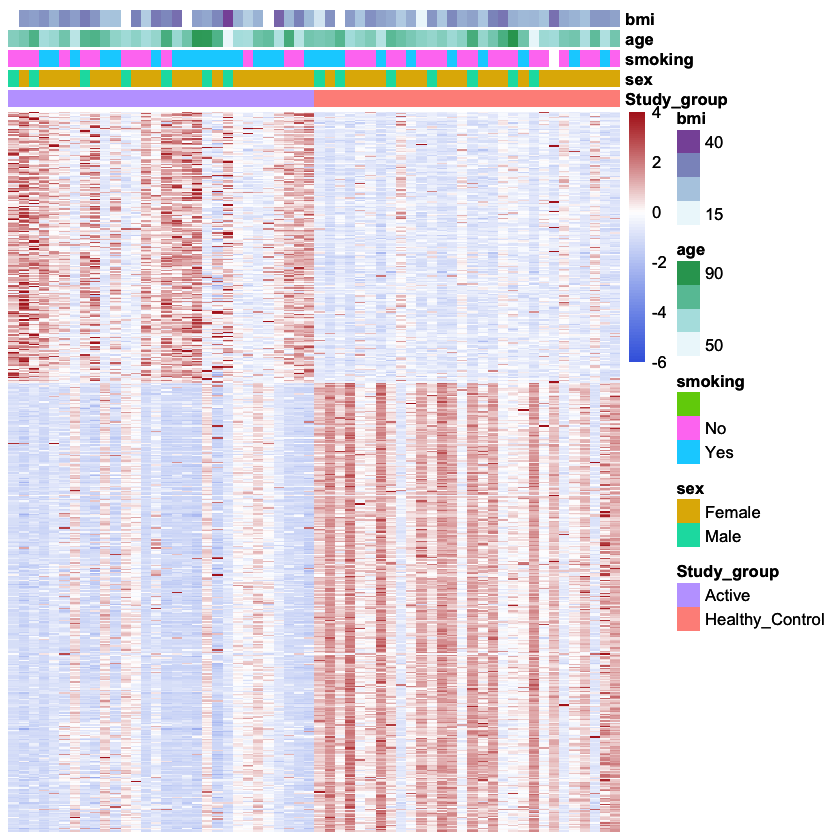

In [27]:
heatmap_plot1 <- pheatmap(zscore_active_and_control_proteins_only_transposed, annotation = colors_df,show_colnames = FALSE, 
                          show_rownames = FALSE, cluster_cols = FALSE, cluster_rows = FALSE, color = myColor, breaks=myBreaks)
pdf(file="../../analysis/Figure2_A_B_C_D_E_F/Active_vs_Controls_heatmap.pdf")
print(heatmap_plot1)
dev.off()
print(heatmap_plot1)

In [23]:
#2.#Make a vector of the sample status for the heatmap
 
colors_df2 <- data.frame(matrix(data = 0, nrow = 60, ncol=1))
colnames(colors_df2) <- c("age")
#"Study_group","sex","smoking","bmi"
#print(colors_df)
#colors_df2[,1] <- all_proteins_active_and_control$Study_group
#colors_df2[,2] = all_proteins_active_and_control$sex
#colors_df2[,3] = all_proteins_active_and_control$smoking
colors_df2[,1] = all_proteins_active_and_control$age
#colors_df2[,5] = all_proteins_active_and_control$bmi

rownames(colors_df2) <- all_proteins_active_and_control$sample_ID
dim(colors_df2)

[1] 60  1

pdf 
  2

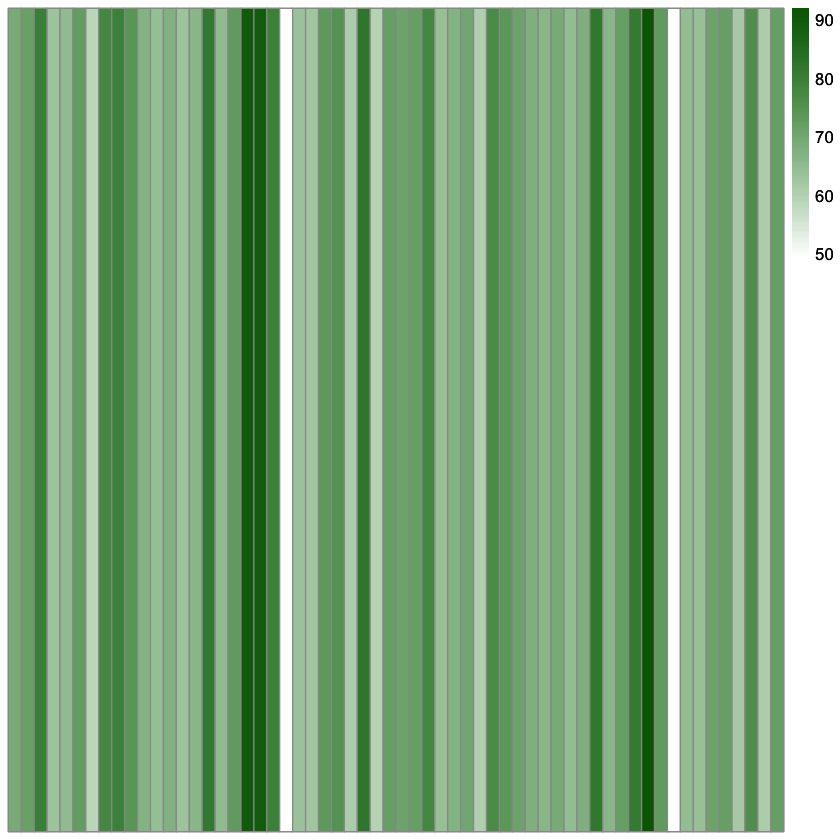

In [28]:
heatmap_plot3 <- pheatmap(t(colors_df2),show_colnames = FALSE, show_rownames = FALSE, 
                          cluster_cols = FALSE, cluster_rows = FALSE, color = colorRampPalette(c("white","darkgreen"))(n=100),na_col = "black" )
pdf(file="../../analysis/Figure2_A_B_C_D_E_F/Active_vs_Controls_age_heatmap.pdf")
print(heatmap_plot3)
dev.off()
print(heatmap_plot3)

In [25]:
#2.#Make a vector of the sample status for the heatmap

colors_df3 <- data.frame(matrix(data = 0, nrow = 60, ncol=1))
colnames(colors_df3) <- c("bmi")
#"Study_group","sex","smoking","age"
#print(colors_df)
#colors_df2[,1] <- all_proteins_active_and_control$Study_group
#colors_df2[,2] = all_proteins_active_and_control$sex
#colors_df2[,3] = all_proteins_active_and_control$smoking
#colors_df2[,1] = all_proteins_active_and_control$age
colors_df3[,1] = all_proteins_active_and_control$bmi

rownames(colors_df3) <- all_proteins_active_and_control$sample_ID
head(colors_df3)

,bmi
,<dbl>
KP9U,NA
KP65,27.10246
KP6H,26.18892
KP68,28.44349
KNYU,23.56477
KP9R,29.70839


pdf 
  2

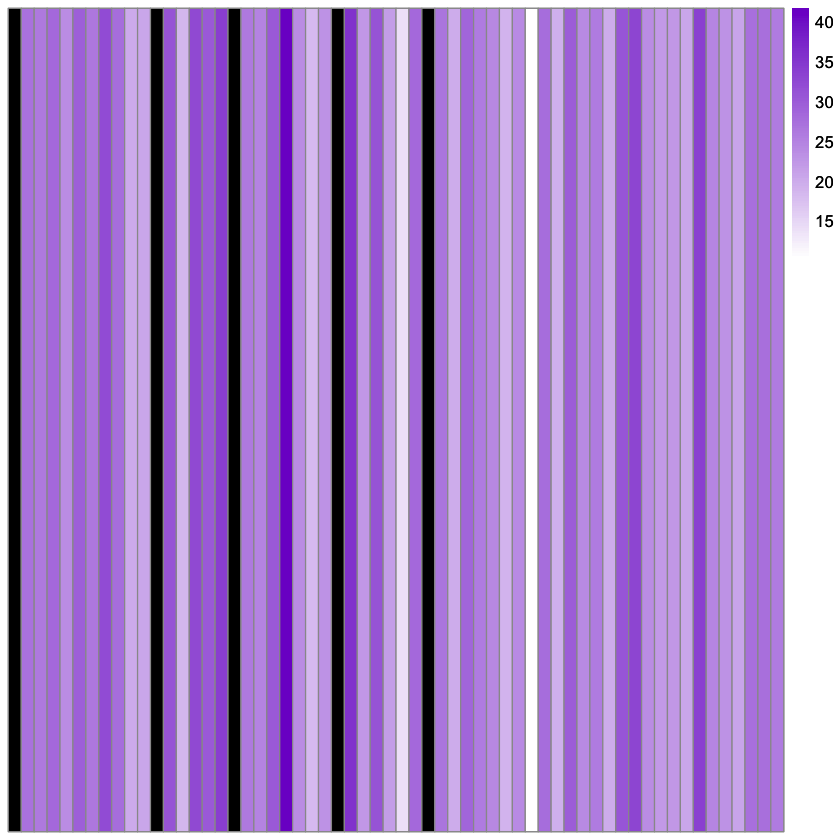

In [29]:
heatmap_plot4 <- pheatmap(t(colors_df3),show_colnames = FALSE, show_rownames = FALSE, 
                          cluster_cols = FALSE, cluster_rows = FALSE, color = colorRampPalette(c("white","purple3"))(n=100), na_col = "black" )
pdf(file="../../analysis/Figure2_A_B_C_D_E_F/Active_vs_Controls_bmi_heatmap.pdf")
print(heatmap_plot4)
dev.off()
print(heatmap_plot4)

In [30]:
controls_demographics_df$BMI_Kg_M2

[1] 13.94703 28.34196       NA 26.62512 19.89081 28.66156 25.82441 24.40730
 [9] 19.02165 23.82625 10.31723 27.86087 19.57036 29.95326 23.95997 25.67822
[17] 19.73950 30.95170 32.92209 23.67479 21.96539 22.35104 20.65953 33.65664
[25] 24.69157 23.02823 20.67391 27.46366 27.43508 25.86247